In [3]:
#hide
import os
#how to make rocm work on a jupyter notebook on a RX6600 or other rdna cards? this is the way 
os.environ['PYTORCH_ROCM_ARCH'] = "gfx1032"
os.environ['HSA_OVERRIDE_GFX_VERSION'] = "10.3.0"
os.environ['HIP_VISIBLE_DEVICES'] = "0"
os.environ['ROCM_PATH'] = "/opt/rocm"

![ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()



# Wthat is this?
I decided to experiment a bit with the computer vision examples provided by fast.ai 

In [4]:
import fastai.vision.all as fastv
fv = fastv

In [5]:
path = fastv.untar_data(fastv.URLs.PETS)
files = fv.get_image_files(path/"images")[:3000]
files[0]
label_f = lambda x: x[0].isupper()


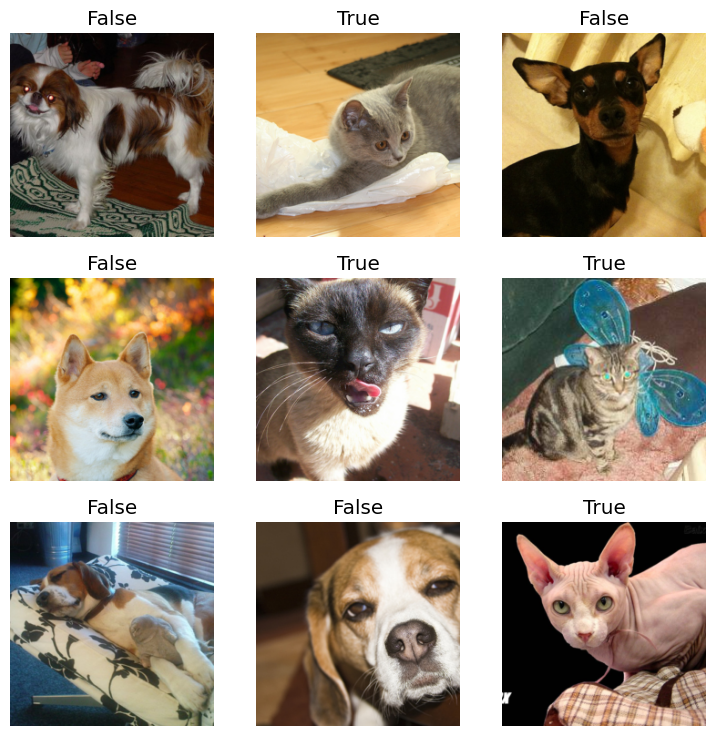

In [8]:
dls = fv.ImageDataLoaders.from_name_func(
    path, files, label_f, item_tfms=fv.Resize(224)
)
dls.show_batch()

In [34]:
#learn = fv.vision_learner(dls, fv.resnet18, metrics=fv.error_rate)
#learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.432091,0.036969,0.010000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.085264,0.044412,0.017500,00:09


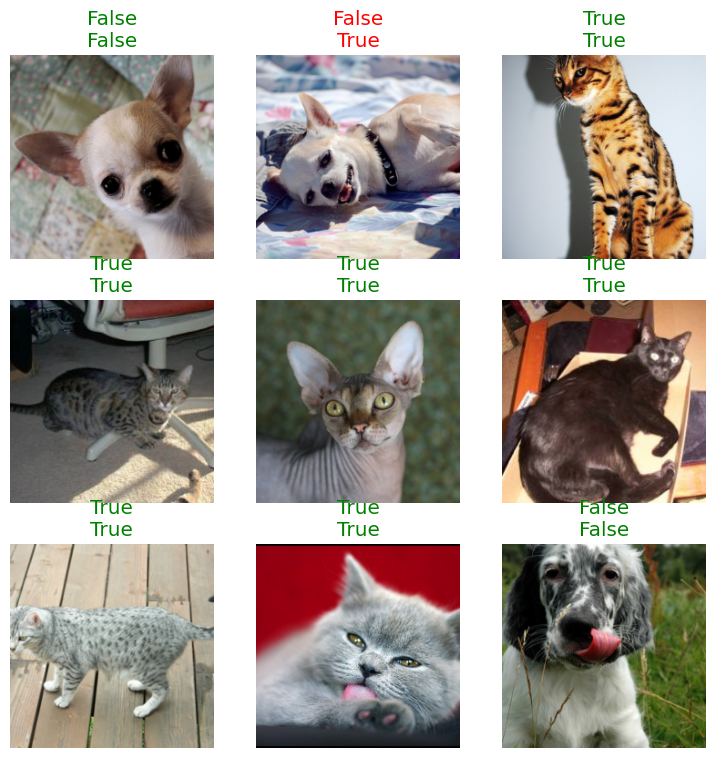

In [36]:
learn.show_results()

# classifying breeds

In [9]:
pattern = r'^(.*)_\d+.jpg'
dls = fv.ImageDataLoaders.from_name_re(path, files, pattern, item_tfms=fv.Resize(224))

In [10]:
learn = fv.vision_learner(dls, fv.resnet18, metrics=fv.error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


/guaxim/Downloads/ai-projects/.venv/lib/python3.12/site-packages/fastai/learner.py:450: SyntaxWarning: invalid escape sequence '\R'
  e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:\n\t{e.args[0]}"]


KeyboardInterrupt: 

We can see that simply increasing the number of layers is hardly useful.

In [13]:
dls = fv.ImageDataLoaders.from_name_re(path, files, pattern, item_tfms=fv.Resize(360))
learn = fv.vision_learner(dls, fv.resnet18, metrics=fv.error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.963249,0.616865,0.190000,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.690534,0.358430,0.110000,00:33


neither is increasing the resolution

In [15]:
dls = fv.ImageDataLoaders.from_name_re(
    path, files, pattern, item_tfms=fv.Resize(420),
    batch_tfms=fv.aug_transforms(size=224))
learn = fv.vision_learner(dls, fv.resnet18, metrics=fv.error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.695164,0.417796,0.145000,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.529567,0.311201,0.102143,00:29


Neither is increasing the resolution even more and adding augmentation transforms, which create variations of a single image with different lighting and angle, for example. Actually, it's worse!

In [16]:
dls = fv.ImageDataLoaders.from_name_re(
    path, files, pattern, item_tfms=fv.Resize(360),
    batch_tfms=fv.aug_transforms(size=224))
learn = fv.vision_learner(dls, fv.resnet34, metrics=fv.error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.523771,0.336171,0.109286,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.489241,0.246458,0.080714,00:41


Wow, seems like we hit a limit: it simply cant get any bettr than the one which resizes to 360 pixels. 
**Did we, tho?t**

/guaxim/Downloads/ai-projects/.venv/lib/python3.12/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=de

SuggestedLRs(valley=0.0012022644514217973)

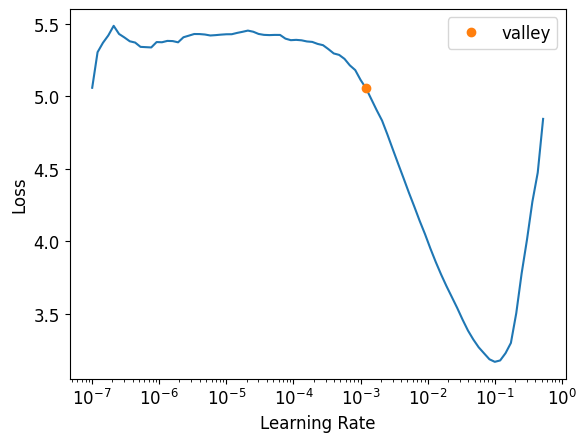

In [17]:
dls = fv.ImageDataLoaders.from_name_re(
    path, files, pattern, item_tfms=fv.Resize(360),
    batch_tfms=fv.aug_transforms(size=224))
learn = fv.vision_learner(dls, fv.resnet34, metrics=fv.error_rate)
learn.lr_find()

In [18]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.392882,0.339506,0.105714,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.544970,0.402294,0.120714,00:41
1,0.325898,0.230488,0.075000,00:41


yeah, no difference, again. Lets check the most disappointing errors of our ebst model:

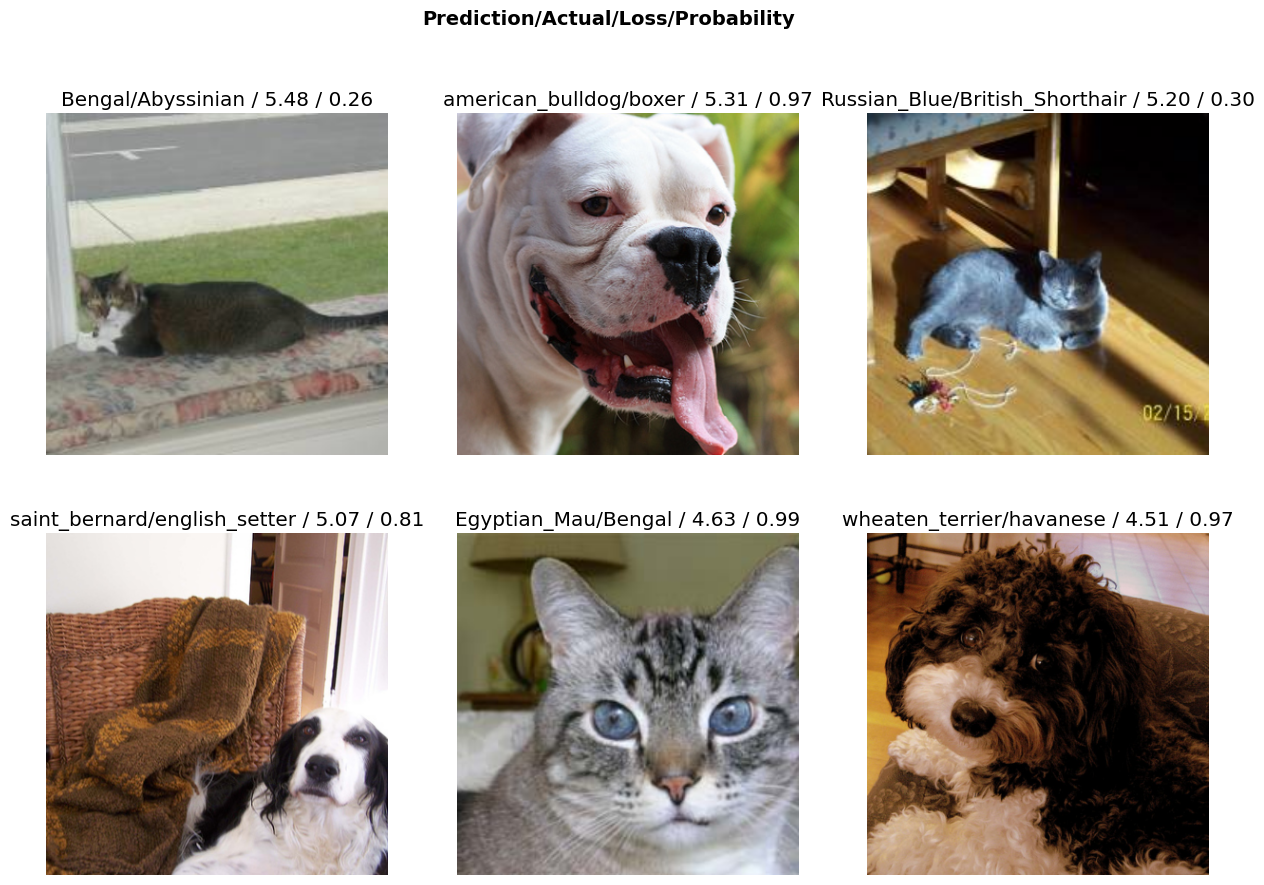

In [16]:
interp = fv.Interpretation.from_learner(learn)
interp.plot_top_losses(6, figsize=(15,10))

though ones, the guesses were quite valid